In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score


In [3]:
# Fetch the California housing dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Select only the relevant columns for clustering
X = df[['Longitude', 'Latitude', 'MedInc']].copy()

# Standardize the features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
# Apply K-Means clustering with an initial guess (e.g., 5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df['Cluster_KMeans'] = y_kmeans

# Display basic information about clusters
df.groupby('Cluster_KMeans')[['MedInc']].mean()


,MedInc
Cluster_KMeans,
0,3.104189
1,6.193948
2,2.691494
3,6.489385
4,2.993708


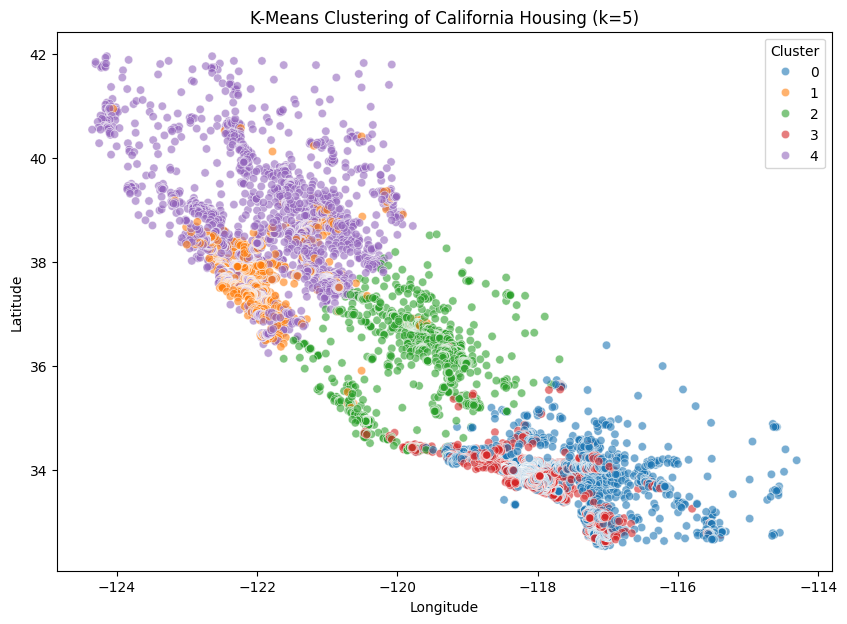

In [5]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=df['Longitude'], 
    y=df['Latitude'], 
    hue=df['Cluster_KMeans'], 
    palette='tab10',
    alpha=0.6
)
plt.title('K-Means Clustering of California Housing (k=5)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()


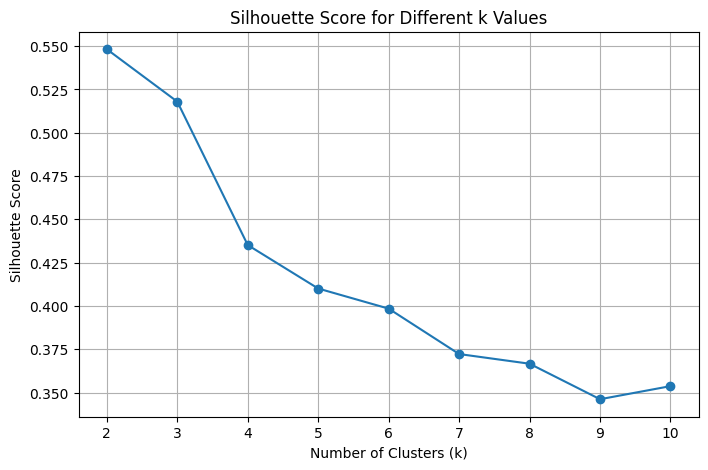

Optimal number of clusters based on Silhouette Score: 2


In [6]:
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot silhouette score vs number of clusters
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Find best k
best_k = k_values[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters based on Silhouette Score: {best_k}')


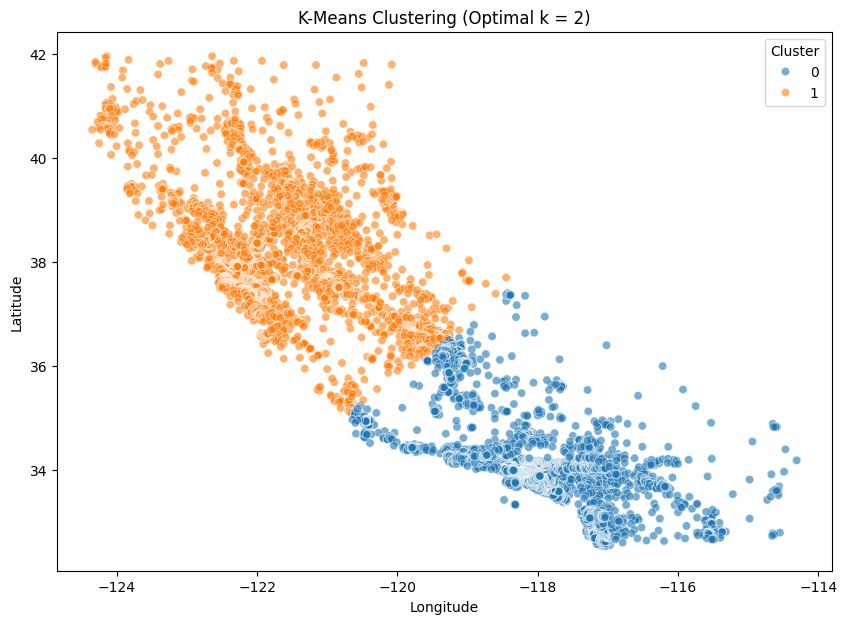

In [7]:
# Apply K-Means with the optimal number of clusters
kmeans_opt = KMeans(n_clusters=best_k, random_state=42)
df['Cluster_Optimal'] = kmeans_opt.fit_predict(X_scaled)

# Visualize the optimized clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=df['Longitude'], 
    y=df['Latitude'], 
    hue=df['Cluster_Optimal'], 
    palette='tab10', 
    alpha=0.6
)
plt.title(f'K-Means Clustering (Optimal k = {best_k})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()


In [8]:
# Summarize clusters by median income and geographic distribution
cluster_summary = df.groupby('Cluster_Optimal')[['MedInc', 'Longitude', 'Latitude']].mean()
cluster_sizes = df['Cluster_Optimal'].value_counts().sort_index()

print("Cluster Summary (Mean Values):\n", cluster_summary)
print("\nCluster Sizes:\n", cluster_sizes)


Cluster Summary (Mean Values):
                    MedInc   Longitude   Latitude
Cluster_Optimal                                 
0                3.922444 -118.003906  33.940767
1                3.799659 -121.717347  37.951359

Cluster Sizes:
 Cluster_Optimal
0    11937
1     8703
Name: count, dtype: int64


In [9]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=50)
y_dbscan = dbscan.fit_predict(X_scaled)

# Add DBSCAN cluster labels
df['Cluster_DBSCAN'] = y_dbscan

# Compute silhouette score (only for non-noise points)
mask = y_dbscan != -1
if mask.sum() > 0:
    dbscan_silhouette = silhouette_score(X_scaled[mask], y_dbscan[mask])
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.3f}")
else:
    print("DBSCAN found only noise or insufficient clusters.")


DBSCAN Silhouette Score: -0.062


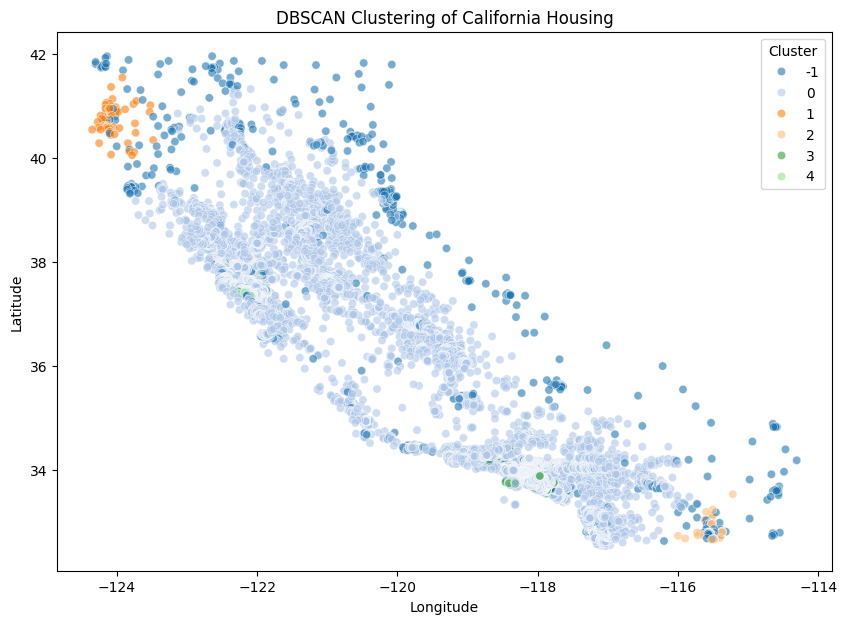

In [10]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=df['Longitude'], 
    y=df['Latitude'], 
    hue=df['Cluster_DBSCAN'], 
    palette='tab20', 
    alpha=0.6
)
plt.title('DBSCAN Clustering of California Housing')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()


In [12]:
print("K-Means Optimal k:", best_k)
print("K-Means Best Silhouette Score:", max(silhouette_scores))
print("DBSCAN Silhouette Score (if valid):", dbscan_silhouette if mask.sum() > 0 else "N/A")

print("\nInterpretation:")
print("- K-Means produces well-separated, roughly circular clusters based on geographic \n and income similarity.")
print("- DBSCAN detects dense regions and can identify noise or irregular-shaped clusters.")
print("- Depending on the dataset distribution, one may perform better. K-Means is more consistent;\n DBSCAN is more flexible.")


K-Means Optimal k: 2
K-Means Best Silhouette Score: 0.5482304452184799
DBSCAN Silhouette Score (if valid): -0.06212908905493562

Interpretation:
- K-Means produces well-separated, roughly circular clusters based on geographic 
 and income similarity.
- DBSCAN detects dense regions and can identify noise or irregular-shaped clusters.
- Depending on the dataset distribution, one may perform better. K-Means is more consistent;
 DBSCAN is more flexible.
